## The libarare 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
#import pandas_ta as ta
# for reproducibility of our results
from sklearn.metrics import r2_score , mean_squared_error 

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM ,BatchNormalization
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Embedding
from keras.callbacks import TensorBoard, EarlyStopping
import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
np.random.seed(10)

1- recal
2- F1 score
3 persision
k fold cv


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.6.0


In [4]:
tf.test.is_gpu_available()


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
training_set_data = pd.read_csv('USDJPY_M5.csv' , sep="\t")
training_set_data['Date'] = training_set_data['Date'] + " "+training_set_data['Time']
training_set_data['Date'] = pd.to_datetime(training_set_data['Date'])
training_set_data.sort_values(by='Date')
training_set_data.set_index("Date" , inplace=True)
training_set_data.drop(columns=["TICKVOL","VOL",'SPREAD','Time','Open','High','Low'], inplace=True)

training_set_data

# training_set_data['Next'] =  training_set_data["Close"].shift(-1)
# training_set_data['Target'] = (training_set_data['Next'] > training_set_data['Close']).as
# del training_set_data['Next']
#dataset_train = dataset_train.drop([0,1127739])

#training_set_data = training_set_data.drop(columns=["Unnamed: 0","Volume",])
#"PSAR","Upper","Lower","Upper_band","Lower_band","FAMA","Ma20","Middle","Ema","Ma10","SMA8","MAMA","WMA","MidPoint","Ma5","TSF","DEMA",])
# training_set_data['DateTime']=pd.to_datetime(training_set_data['DATE'] +' '+ training_set_data['TIME'],format='%Y-%m-%d %H:%M:%S')
# del training_set_data['TIME']
# del training_set_data['DATE']

,Close
Date,
1999-01-04 07:05:00,113.520
1999-01-04 07:10:00,113.500
1999-01-04 07:15:00,113.510
1999-01-04 07:20:00,113.500
1999-01-04 07:25:00,113.570
...,...
2023-08-04 09:40:00,142.578
2023-08-04 09:45:00,142.651
2023-08-04 09:50:00,142.650


In [6]:
# create train test partition
train = training_set_data['2002-01-04 10:20:00':'2021-01-04 10:20:00']
test  = training_set_data['2021-01-04 10:25:00':]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

Train Dataset: (1407896, 1)
Test Dataset: (193459, 1)


<Axes: ylabel='Density'>

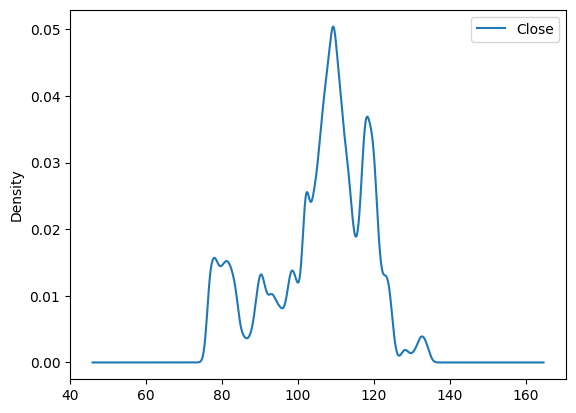

In [7]:
train.plot.kde()

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa1aebba30>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa1aebbf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa1aebb790>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa1aed04f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa1aed0790>],
 'means': []}

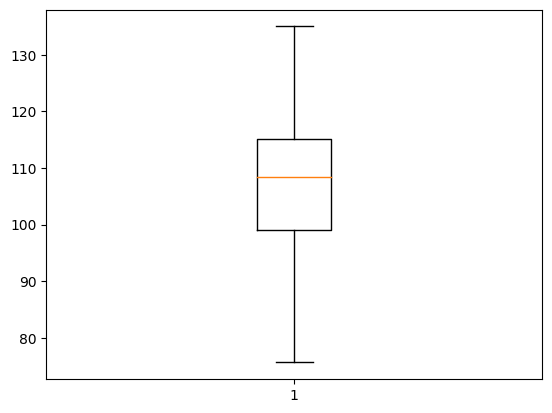

In [8]:
plot.boxplot(train['Close'])

In [8]:
193478/1409364

0.13728036192211523

In [9]:
from joblib  import dump, load

In [10]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()

training_set_scaled = sc.fit_transform(train)

#Y_training_set = sct.fit_transform(Y_training_set)

In [11]:

dump(sc, 'USDJPY_M5_Scaler2R.bin', compress=True)

['USDJPY_M5_Scaler2R.bin']

In [13]:
training_set_scaled

array([[ 1.41073658],
       [ 1.41635456],
       [ 1.41573034],
       ...,
       [-0.34400749],
       [-0.34556804],
       [-0.34737828]])

In [ ]:
# X = []
# Y = []
# for i in range(n_past, len(x)-n_past, n_past):
#     X.append(x[i:i+n_past])
#     Y.append(x[i+n_past])

In [19]:
Y = training_set_data['Close'].values

In [20]:
Y

array([113.52 , 113.5  , 113.51 , ..., 142.65 , 142.645, 142.606])

In [21]:
n_future = 1
n_past = 30
X_train = []
y_train = []
for i in range( n_past , len(training_set_scaled)):
    X_train.append(training_set_scaled[i-n_past:i   ])
    y_train.append(training_set_scaled[i + n_future - 1 ]) 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.01, random_state=42,shuffle=True)

In [23]:
X_train, y_train = np.array(X_train), np.array(y_train)


In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
 

In [25]:
X_train.shape

(1393787, 30, 1)

In [26]:
from tensorflow.keras.layers import Bidirectional

In [27]:
#earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=9, activation='relu', input_shape=(120, 21)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(BatchNormalization()) 
# model.add(Conv1D(filters=32, kernel_size=9, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(BatchNormalization()) 
# model.add(Conv1D(filters=8, kernel_size=9, activation='tanh'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(BatchNormalization()) 
# model.add(Dropout(0.2))

model.add(
    Bidirectional(LSTM(512, input_shape=(X_train.shape[1],X_train.shape[2]),
                       return_sequences=True),
                  merge_mode='sum',
                  weights=None,
                  input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.
    
model.add(LSTM(256, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

model.add(LSTM(256, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

model.add(LSTM(128,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
    
model.add(LSTM(128,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

model.add(LSTM(64,return_sequences=False))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# model.add(Dense(64 ,kernel_initializer='uniform', activation='linear'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization()) 

# model.add(Dense(16 ,kernel_initializer='uniform', activation='linear'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
    
model.add(Dense(1, activation='linear'))
    
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

model.summary()
filepath = "USDJPY_M5R.h5"  # unique file name that will include the epoch and the validation acc for that epoch
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min') # saves only the best ones

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 30, 512)           2105344   
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 256)           787456    
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 256)           525312    
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 128)           197120    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [ ]:
model.fit(x=X_train,y=y_train,batch_size=1024,epochs=100,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/100
 402/1089 [==========>...................] - ETA: 2:45 - loss: 0.3328

In [10]:

from keras.models import load_model

try11m = load_model("USDJPY_M5.h5")
sc1=load('USDJPY_M5_Scaler.bin')

In [ ]:
try11m.summary()

In [17]:
test = sc1.transform(test)

In [18]:
n_future = 1
n_past = 60
X_test = []
y_test = []
for i in range( n_past , len(test)  ):
    X_test.append(test[i-n_past:i   ])
    y_test.append(test[i + n_future - 1 ])
 

In [21]:
X_test.shape

(193399, 60, 1)

In [19]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [20]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [27]:
try11m.evaluate(X_test, y_test)

4394/6044 [====================>.........] - ETA: 43s - loss: 5.8621e-06


KeyboardInterrupt



In [28]:
pred = try11m.predict(X_test)



KeyboardInterrupt



In [ ]:
r2_score(y_test ,pred)*100

In [24]:
sc1.inverse_transform(pred)

array([[102.68968],
       [102.69941],
       [102.70695],
       ...,
       [142.57848],
       [142.61844],
       [142.65161]], dtype=float32)

In [25]:
sc1.inverse_transform(y_test)

array([[102.992],
       [102.983],
       [102.961],
       ...,
       [142.65 ],
       [142.645],
       [142.606]])

In [26]:
mean_squared_error(sc1.inverse_transform(y_test) ,sc1.inverse_transform(pred)) 

0.020731685230395966

In [ ]:
try11m.evaluate(X_train, y_train)

In [ ]:
y_test

In [ ]:
pred1 = try11m.predict(X_test[[1]])


In [ ]:
mean_squared_error(sc1.inverse_transform(y_test[[1]]) ,sc1.inverse_transform(pred)) 

In [ ]:
(sc1.inverse_transform(y_test[[1]]) ,sc1.inverse_transform(pred1))

In [ ]:
dataset_train.to_csv('EURUSDF1_1M.csv')

In [ ]:
from keras.models import load_model

model.save('lstm_best%994.h5')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(pred, label='pred')
plt.plot(y_test, label='acthail')

plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(16,16))
plt.plot(model.history.history["loss"], label="training loss")
plt.plot(model.history.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

model.save('lstm_best%998.h5')

In [ ]:
from keras.models import load_model

model.save('EURUSD2.h5')

In [ ]:
'''
model = keras.Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 4)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
'''

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')


model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],4)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
'''
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(X_train.shape[1], 4)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
'''

In [ ]:
model = Sequential()
model.add(LSTM(128,
               input_shape=(X_train.shape[1], 4),
               return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.
    
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))
model.add(BatchNormalization())
    
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
    
model.add(Dense(units=1)) 

model.compile(
        loss='mean_squared_error',
        optimizer='adam',
     
    )

In [ ]:
model.fit(
        X_train, y_train
        , batch_size=200, epochs=50
  
    )

In [ ]:
from keras.models import load_model

model.save('EURGBPF7.h5')

In [ ]:
triget = training_set.iloc[:, 4:5]



In [ ]:
target = sct.fit_transform(triget)

In [ ]:
predictions = model.predict(X_train)
predictions = sct.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_train)**2)
rmse

In [ ]:
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(X_train.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
'''
earlyStoppingCallback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = Sequential()
model.add(LSTM(128,
               input_shape=(X_train.shape[1], 5),
               return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.
    
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))
model.add(BatchNormalization())
    
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
    
model.add(Dense(units=1)) 

model.compile(
        loss='mean_squared_error',
        optimizer='adam',
     
    )
    '''

In [ ]:
regression.fit(X_train,y_train,batch_size=30,epochs=1)

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=32)